In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 준비
from sklearn.datasets import load_digits

digits_dataset = load_digits()
np.unique(digits_dataset['target'], return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

In [7]:
# 불균형 데이터셋 만들기

from sklearn.model_selection import train_test_split

X = digits_dataset['data']
y = digits_dataset['target']
yis3 = (y == 3).astype(int) # yis3은 불균형 데이터셋
# print( np.unique(yis3, return_counts=True) ) # 테스트
X_train, X_test, y_train, y_test = \
    train_test_split(X, yis3, stratify=yis3, random_state=42)

In [8]:
# 모델 훈련
from sklearn.dummy import DummyClassifier # 알고리즘으로 학습하지 않는 모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

dc = DummyClassifier(strategy="most_frequent")
dc.fit(X_train, y_train)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# 모델 평가 1 : 정확도 기반 모델 평가의 문제점
print( np.round(dc.score(X_test, y_test), 2), 
      np.round(logreg.score(X_test, y_test), 2), 
      np.round(dtc.score(X_test, y_test), 2) )

(logreg.predict(X_test) == y_test).sum() / len(y_test)
(dtc.predict(X_test) == y_test).sum() / len(y_test)

0.9 0.98 0.97


np.float64(0.9711111111111111)

[[404   0]
 [ 46   0]]
[[397   7]
 [  3  43]]


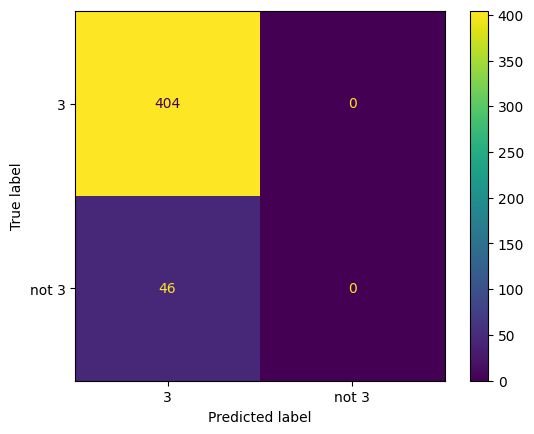

In [ ]:
# confusion matrix 계산 및 표시
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, dc.predict(X_test))
cm2 = confusion_matrix(y_test, logreg.predict(X_test))

print(cm1)
print(cm2)
ConfusionMatrixDisplay.from_estimator(dc, X_test, y_test, 
                                      display_labels=['3', 'not 3'])
plt.show()

In [24]:
# 모델 평가 2
from sklearn.metrics import recall_score, precision_score, f1_score

print(recall_score(y_test, dc.predict(X_test)),
      precision_score(y_test, dc.predict(X_test)),
      f1_score(y_test, dc.predict(X_test)))

print(recall_score(y_test, logreg.predict(X_test)),
      precision_score(y_test, logreg.predict(X_test)),
      f1_score(y_test, logreg.predict(X_test)))


0.0 0.0 0.0
0.9347826086956522 0.86 0.8958333333333334


c:\Users\human\.conda\envs\human-da-env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dc.predict(X_test)))
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       404
           1       0.00      0.00      0.00        46

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.81      0.90      0.85       450

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       404
           1       0.86      0.93      0.90        46

    accuracy                           0.98       450
   macro avg       0.93      0.96      0.94       450
weighted avg       0.98      0.98      0.98       450



c:\Users\human\.conda\envs\human-da-env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\human\.conda\envs\human-da-env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\human\.conda\envs\human-da-env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [ ]:
# 임계값을 변경해서 예측 결과를 다르게 선택
train_decision_values = logreg.decision_function(X_train)
print( train_decision_values[train_decision_values > 10].shape )
print( train_decision_values[train_decision_values > -10].shape )

train_proba_values = logreg.predict_proba(X_train)
tv = train_proba_values[:][:, 1] # 두 번째 열 데이터 뽑기 ( Positive에 대한 확률 )
# np.round(train_proba_values[tv > 0.5][:, 1], 2)
print( train_proba_values[tv > 0.7].shape )
print( train_proba_values[tv > 0.3].shape )


(102,)
(276,)
(131, 2)
(139, 2)


In [63]:
# 데이터 준비
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

print( X.shape )
print( np.unique(y, return_counts=True) )


(4500, 2)
(array([0, 1]), array([4000,  500]))


In [64]:
# 모델 훈련
from sklearn.svm import SVC

svc = SVC(gamma=0.5)
svc.fit(X_train, y_train)

SVC(gamma=0.5)

(1125,) (1126,) (1126,)
977


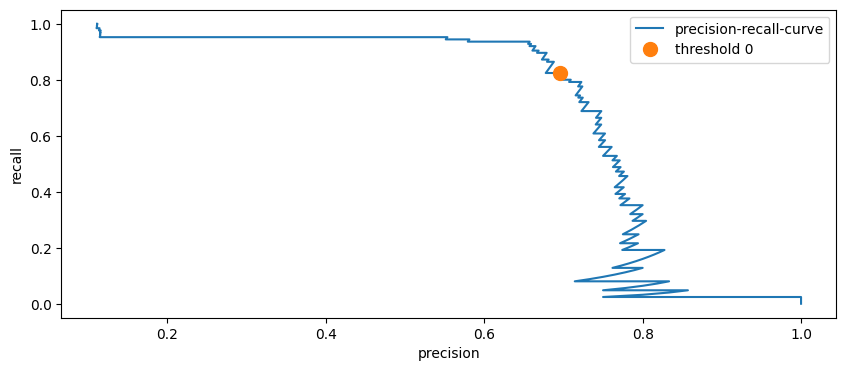

In [75]:
# 모델 평가 및 의사 결정 정보 확인

from sklearn.metrics import precision_recall_curve

# 임계치의 변경에 따른 precision, recall의 변화를 도출
precisions, recalls, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
print( thresholds.shape, precisions.shape, recalls.shape )

idx = np.argmin(np.abs(thresholds)) # 0에 가장 가까운 threshold 값의 위치 찾기
print(idx)

plt.figure(figsize=(10, 4))
plt.plot(precisions, recalls, label='precision-recall-curve')
plt.plot(precisions[idx], recalls[idx], 'o', markersize=10, label='threshold 0')
plt.xlabel('precision')
plt.ylabel('recall')
plt.legend()
plt.show()

66


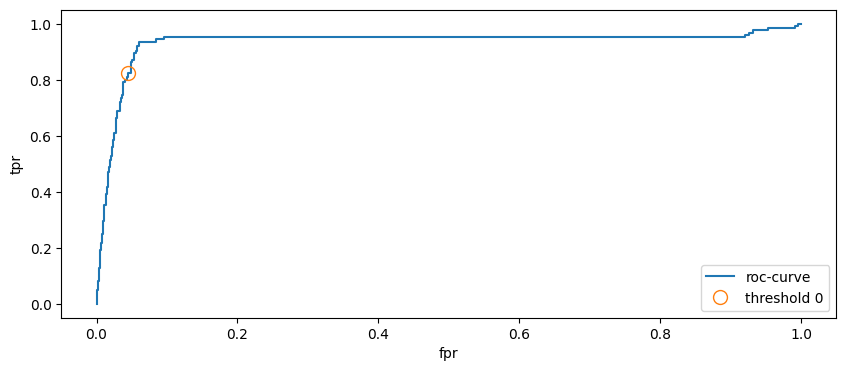

In [77]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

idx = np.argmin(np.abs(thresholds)) # 0에 가장 가까운 threshold 값의 위치 찾기
print(idx)

plt.figure(figsize=(10, 4))
plt.plot(fpr, tpr, label='roc-curve')
plt.plot(fpr[idx], tpr[idx], 'o', markersize=10, label='threshold 0', fillstyle='none')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()

In [78]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, svc.decision_function(X_test))
print(auc)


0.932712
